# Explorative Daten-Analyse (EDA)
## 1) Daten laden

In [2]:
# Bibliotheken laden
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import display_html
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Excel auslesen
url = "https://github.com/sebastianiu/Prognosemodell_Online_Kreditzahlungsverkehr/raw/main/data/raw/PSP_Jan_Feb_2019.xlsx"
Datensatz = pd.read_excel(url)
Datensatz = Datensatz.rename(columns = {"Unnamed: 0":"id"})

### Deskriptive statistiken

In [ ]:
# Descriptive statistics
Datensatz.describe()

,id,amount,success,3D_secured
count,50410.000000,50410.000000,50410.000000,50410.000000
mean,25204.500000,202.395715,0.202896,0.238266
std,14552.257872,96.274730,0.402160,0.426027
min,0.000000,6.000000,0.000000,0.000000
25%,12602.250000,133.000000,0.000000,0.000000
50%,25204.500000,201.000000,0.000000,0.000000
75%,37806.750000,269.000000,0.000000,0.000000
max,50409.000000,630.000000,1.000000,1.000000


## 1) Beurteilung Datenqualität
### 1.1 Felder und Datentypen

In [ ]:
# Datenformate überprüfen
print(Datensatz.dtypes)

Unnamed: 0             int64
tmsp          datetime64[ns]
country               object
amount                 int64
success                int64
PSP                   object
3D_secured             int64
card                  object
dtype: object


### 1.2 Qualitäts-Check der Datumswerte in Feld "tmsp"

In [ ]:
# Qualitätscheck Feld "tmsp"
#Ermittle Anzahl Transaktionen pro Tag
Daten_gruppiert_tmp = Datensatz.groupby([Datensatz['tmsp'].dt.strftime('%d.%m.%y'),'PSP'])['id'].count()
Daten_gruppiert = pd.DataFrame(Daten_gruppiert_tmp)

Daten_gruppiert['Datum'] = Daten_gruppiert.index.get_level_values('tmsp')
Daten_gruppiert['PSP'] = Daten_gruppiert.index.get_level_values('PSP')
Daten_gruppiert['Datum'] = pd.to_datetime(Daten_gruppiert['Datum'], format='%d.%m.%y')
Daten_gruppiert['Wochentag'] = Daten_gruppiert['Datum'].dt.day_name()
Daten_gruppiert = Daten_gruppiert.rename(columns={'id':'Anzahl Transaktionen'})
Daten_gruppiert.sort_values(by='Datum', inplace=True)

# Liniendiagramm nach Tagesdatum erstellen
fig1 = px.line(Daten_gruppiert, x='Datum', y="Anzahl Transaktionen",color='PSP')
fig1.show()

#Kontrolle, Min- / Max-Datum
print('Min-Datum: ',Datensatz['tmsp'].min())
print('Max-Datum: ',Datensatz['tmsp'].max())

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['tmsp'].isnull().sum())

Min-Datum:  2019-01-01 00:01:11
Max-Datum:  2019-02-28 23:48:19
Anzahl Datenzeilen mit leeren Werten  0


### 1.3 Qualitätscheck im Feld "country"

In [ ]:
# Qualitätscheck im Feld "country"
Expected_Category = 'Germany'+ '|'+ 'Switzerland' +'|' + 'Austria'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['country'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'Germany', 'Switzerland', etc.", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['country'].str.contains(Expected_Category, na =False)][['country']])

Daten_tmp = Datensatz.groupby('country')['country'].count()
fig = px.pie(Daten_tmp, values='country', names=Daten_tmp.index.values,title='Anzahl Transaktionen nach country')
fig.show()

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['country'].isnull().sum())

Expected_Category are :  Germany|Switzerland|Austria


✅ Keine Kategorie außer 'Germany', 'Switzerland', etc.

Anzahl Datenzeilen mit leeren Werten  0


### 1.4 Qualitätscheck für das Feld "amount"

In [ ]:
# Qualitätscheck für das Feld "amount"
#Histogram
fig = px.histogram(Datensatz, x="amount",color='PSP')
fig.show()

#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['amount'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.5 Qualitätscheck Feld "success"

In [ ]:
#Qualitätscheck Feld "success"
Daten1 = Datensatz.groupby('success')['success'].count()
fig = px.pie(Daten1, values='success', names=Daten1.index.values,title='Anzahl Transaktionen nach "success"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['success'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.6 Qualitätscheck im Feld "PSP"

In [ ]:
# Qualitätscheck im Feld "PSP"
Expected_Category = 'UK_Card'+ '|'+ 'Simplecard' +'|' + 'Moneycard'+ '|'+  'Goldcard'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['PSP'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'UK_Card', 'Simplecard', etc.", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['PSP'].str.contains(Expected_Category, na =False)][['PSP']])

Daten2 = Datensatz.groupby('PSP')['PSP'].count()
fig = px.pie(Daten2, values='PSP', names=Daten2.index.values,title='Anzahl Transaktionen nach "PSP"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['PSP'].isnull().sum())

Expected_Category are :  UK_Card|Simplecard|Moneycard|Goldcard


✅ Keine Kategorie außer 'UK_Card', 'Simplecard', etc.

Anzahl Datenzeilen mit leeren Werten  0


### 1.7 Qualitätscheck im Feld "3D_secured"

In [ ]:
# Qualitätscheck im Feld "3D_secured"
Daten2 = Datensatz.groupby('3D_secured')['3D_secured'].count()
fig = px.pie(Daten2, values='3D_secured', names=Daten2.index.values,title='Anzahl Transaktionen nach "3D_secured"')
fig.show()
#Kontrolle, ob leere Werte vorhanden
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['3D_secured'].isnull().sum())

Anzahl Datenzeilen mit leeren Werten  0


### 1.8 Qualitätscheck für das Feld 'card'

In [ ]:
#Qualitätscheck für das Feld 'card'
Expected_Category = 'Master'+ '|'+ 'Visa' +'|' + 'Diners'
print("Expected_Category are : ", Expected_Category)
if(sum(~Datensatz['card'].str.contains(Expected_Category, na =False))==0):
    display_html(f"<h3><br/>✅ Keine Kategorie außer 'Master', 'Visa' or 'Diners'", raw=True)
else:
    display_html(f"<h3><br/>❌ Nachfolgende Zeilen enthalten nicht die erwarteten Kategorien", raw=True)
    display(Datensatz[~Datensatz['card'].str.contains(Expected_Category, na =False)][['card']])

#Kontrolle, ob leere Werte vorhanden
print('\n' )
print('Anzahl Datenzeilen mit leeren Werten ',Datensatz['card'].isnull().sum())

#Visualisierung als Pie Chart
Daten3 = Datensatz.groupby('card')['card'].count()
fig = px.pie(Daten3, values='card', names=Daten3.index.values,title='Anzahl Transaktionen nach "card"')
fig.show()

Expected_Category are :  Master|Visa|Diners


✅ Keine Kategorie außer 'Master', 'Visa' or 'Diners'



Anzahl Datenzeilen mit leeren Werten  0


## 2) Merkmalswichtigkeit
### 2.1 Univariate Merkmalsauswahl
#### Untersuchung linearer Korrelationen zur Zielvariablen "success" mit Pearson's Korrelationskoeffizient

<ipython-input-61-601e4d61dbf9>:17: FutureWarning:

The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



[Text(0, 0, '0.001'),
 Text(0, 0, '-0.087'),
 Text(0, 0, '0.059'),
 Text(0, 0, '-0.010'),
 Text(0, 0, '-0.012'),
 Text(0, 0, '-0.005'),
 Text(0, 0, '0.008')]

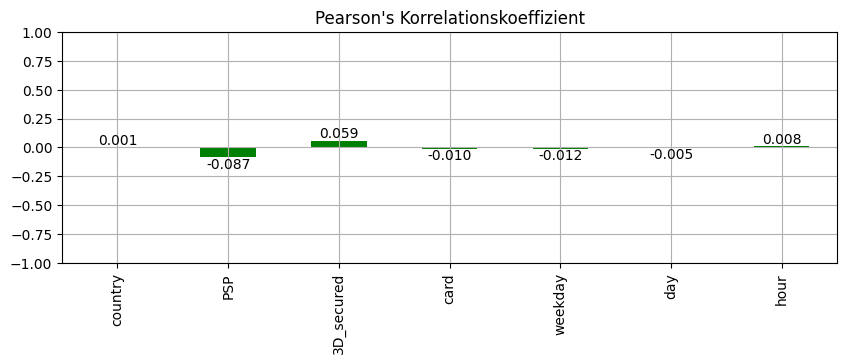

In [ ]:
## Daten aufbereiten
categorical_features = Datensatz.filter(['tmsp','country','success','PSP','3D_secured','card'], axis=1)

label_encoder = LabelEncoder()
# Features weekday & hour erzeugen
categorical_features['weekday'] = categorical_features.tmsp.dt.day_name()
categorical_features['day'] = categorical_features.tmsp.dt.strftime('%d').astype(int)
categorical_features['hour']  = categorical_features.tmsp.dt.strftime('%H').astype(int)

# Daten in numerische Werte encoden
categorical_features['weekday'] = label_encoder.fit_transform(categorical_features['weekday'])
categorical_features['country'] = label_encoder.fit_transform(categorical_features['country'])
categorical_features['PSP'] = label_encoder.fit_transform(categorical_features['PSP'])
categorical_features['card'] = label_encoder.fit_transform(categorical_features['card'])

# Pearson's Korrelationskoeffizient berechnen
ax = categorical_features.drop('success', axis=1).corrwith(categorical_features.success,method='pearson').plot(
    kind='bar', grid=True, figsize=(10,3), title="Pearson's Korrelationskoeffizient",
    color="green",ylim=(-1,1));
ax.bar_label(ax.containers[0],fmt='%.3f')

#### Untersuchung der Korrelationen numerischer Merkmalsvariable "amount" zur Zielvariablen "success" mit Chi-Quadrat Test

In [ ]:
from sklearn.feature_selection import chi2

X = categorical_features.filter(['weekday','day','hour','country','PSP','3D_secured','card'], axis=1)
y = categorical_features['success']
scores, pvalues = chi2(X, y)

chi2_values = pd.DataFrame(columns=['Merkmal','P-Wert','Chi2-Statistik'])

for i in range(len(scores)):
  current_row =  pd.DataFrame({'Merkmal':[X.columns[i]], 'P-Wert':[round(pvalues[i],5)],'Chi2-Statistik':[scores[i]]})
  chi2_values = pd.concat([chi2_values,current_row])

chi2_values.sort_values(by='Chi2-Statistik',ascending = True , inplace = True)
#Visualisierung als Balkendiagramm
fig = px.bar(chi2_values,title='Chi-Quadrat-Test', x='Chi2-Statistik', y='Merkmal')
fig.show()

#### Betrachtung der Verteilung der Merkmalsvariablen

In [ ]:
# Features weekday & hour erzeugen
Datensatz['weekday'] = Datensatz.tmsp.dt.day_name()
Datensatz['hour']  = Datensatz.tmsp.dt.strftime('%H').astype(int)

#Histogram aller Merkmalsvariablen
fig = px.histogram(Datensatz, x="amount",color='success', title='Verteilung von "amount"')
fig.show()
fig = px.histogram(Datensatz, x="PSP",color='success', title='Verteilung von "PSP"')
fig.show()
fig = px.histogram(Datensatz, x="3D_secured",color='success', title='Verteilung von "3D_secured"')
fig.show()
fig = px.histogram(Datensatz, x="card",color='success', title='Verteilung von "card"')
fig.show()
fig = px.histogram(Datensatz, x="weekday",color='success', title='Verteilung von "weekday"')
fig.show()
fig = px.histogram(Datensatz, x="hour",color='success', title='Verteilung von "hour"')
fig.show()
fig = px.histogram(Datensatz, x="hour",color='success', title='Verteilung von "hour"')
fig.show()
fig = px.histogram(Datensatz, x=Datensatz.tmsp.dt.day_name(),color='success', title='Verteilung von "day"')
fig.show()
fig = px.histogram(Datensatz, x='country',color='success', title='Verteilung von "country"')
fig.show()

### 2.2 Modellbasierte Merkmalsauswahl
#### RandForest

#### Daten aufbereiten & encoden

In [ ]:
# Modell-Entwicklung
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Daten encoden
label_encoder_country = LabelEncoder()
label_encoder_psp = LabelEncoder()
label_encoder_card = LabelEncoder()
label_encoder_wday = LabelEncoder()

ML_Daten = Datensatz.filter(['amount','success','PSP','country','card','tmsp','3D_secured'], axis=1)

ML_Daten['country'] = label_encoder_country.fit_transform(ML_Daten['country'])
ML_Daten['PSP'] = label_encoder_psp.fit_transform(ML_Daten['PSP'])
ML_Daten['card'] = label_encoder_card.fit_transform(ML_Daten['card'])
# Datumswerte in Tag/ Wochentag/ Stunde aufteilen
ML_Daten['weekday'] = ML_Daten['tmsp'].dt.day_name()
ML_Daten['weekday'] = label_encoder_wday.fit_transform(ML_Daten['weekday'])
ML_Daten['day'] = ML_Daten['tmsp'].dt.strftime('%d').astype(int)
ML_Daten['hour'] = ML_Daten['tmsp'].dt.strftime('%H').astype(int)
# Daten-Separation als X Merkmale and Zielvariable Y und Aufteilung in TRaininfs- und Testdaten
Y = ML_Daten['success']
X = ML_Daten.filter(['amount','PSP','3D_secured','card','country','weekday','day','hour'], axis=1)
X['random'] = np.random.random(size=len(X)) # Spalte mit Zufallswert um Reliabilität der Gwichtung zu prüfen

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


## Modelltraining

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

print(f"Bewertung der Vorhersage-Genauigkeit auf Basis der Trainingsdaten: {rfc.score(x_train, y_train)}")
print(f"Bewertung der Vorhersage-Genauigkeit auf Basis der Testdaten: {rfc.score(x_test, y_test)}")

Bewertung der Vorhersage-Genauigkeit auf Basis der Trainingsdaten: 1.0
Bewertung der Vorhersage-Genauigkeit auf Basis der Testdaten: 0.7852608609402896


##### A) Im Model Integrierte Merkmalsgewichtung mit Attribut "feature_importances_"
Häufigkeit der Verwendung des Merkmal in jedem Baum des. Formal wird sie als die (normierte) Gesamtreduktion des Kriteriums durch dieses Merkmal berechnet.

In [ ]:
importances = rfc.feature_importances_
indices = np.argsort(importances)

feature_importance_list = pd.DataFrame(columns=['Merkmal','Gewichtung'])

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair

feature_importance_list = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gewichtung'})
feature_importance_list['Merkmal']= feature_importance_list.index.values
feature_importance_list['Gewichtung']= round(feature_importance_list.Gewichtung,3)
feature_importance_list.sort_values(by='Gewichtung')

feature_importance_list = feature_importance_list.sort_values(by = 'Gewichtung', ascending= True)
print(feature_importance_list)

#Visiualisierung in Balkendiagramm
fig = px.bar(feature_importance_list, x='Gewichtung', y='Merkmal',title='Merkmals-Gewichtung nach Gini-Koeffizient',text='Gewichtung')
fig.show()

            Gewichtung     Merkmal
3D_secured       0.016  3D_secured
card             0.033        card
country          0.045     country
PSP              0.051         PSP
weekday          0.072     weekday
day              0.131         day
hour             0.145        hour
amount           0.232      amount
random           0.275      random


##### B) Merkmals-Gewichtung nach Permutation
Technik, mit der die Bedeutung eines Merkmals für ein bestimmtes angepasstes Modell bewertet wird. Im Grunde genommen wird ein Merkmal umgestellt und es wird geprüft, wie das Modell seine Vorhersage ändert. Die Veränderung der Vorhersage entspricht also der Bedeutung des Merkmals.

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(rfc, x_train, y_train,n_repeats= 20 ,random_state=0)

feature_perm_importance_list = pd.DataFrame(columns = ['Merkmal','Gewichtung'])

for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print( f"{x_test.columns[i]:<8}"
                f"{round(r.importances_mean[i],3):.3f}"
                f" +/- {r.importances_std[i]:.3f}"
              )
         current_row = pd.DataFrame({'Merkmal':[x_train.columns[i]],'Gewichtung':[r.importances_mean[i]]})
         feature_perm_importance_list = pd.concat([feature_perm_importance_list, current_row])

feature_perm_importance_list['Gewichtung']= round(feature_perm_importance_list.Gewichtung,3)

#Visiualisierung in Balkendiagramm
fig = px.bar(feature_perm_importance_list.sort_values(by = 'Gewichtung', ascending= True), x='Gewichtung', y='Merkmal',title='Merkmals-Gewichtung nach zufälliger Permutation',text='Gewichtung')
fig.show()

amount  0.165 +/- 0.001
random  0.147 +/- 0.001
PSP     0.144 +/- 0.001
hour    0.144 +/- 0.001
day     0.128 +/- 0.001
weekday 0.101 +/- 0.001
card    0.091 +/- 0.001
3D_secured0.073 +/- 0.001
country 0.051 +/- 0.001
